# Kaggle's Avacado price prediction 

Source: https://www.kaggle.com/smokingkrils/avacado-price-prediction/tasks  
For this example, I took out some of the data from the data set, to show different ways to deal with Nans.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings

In [55]:
warnings.filterwarnings('ignore')

Avocado is a fruit consumed by people heavily in the United States.

The table below represents weekly 2018 retail scan data for USA National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## Data Dictionary

**Date** - The date of the observation  
**type** - conventional or organic  
**year** - the year  
**Region** - the city or region of the observation  
**Total Volume** - Total number of avocados sold  
**4046** - Total number of avocados with PLU 4046 sold  
**4225** - Total number of avocados with PLU 4225 sold  
**4770** - Total number of avocados with PLU 4770 sold  
**AveragePrice** - the average price of a single avocado  
**region** - Region od the sale  
**state** - US state of the sale

**Here are some helper functions for your use:**

In [56]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function gets a pandas DataFrame, and a threshold (% of data), 
    and returns the list of binary features from that dataframe that have 
    above threshold amount of samples with the same value, and thus
    should be considered redundant. 
    '''
    
    bool_cols = [col for col in data.columns \
                 if pd.Series(list(set(data[col]))).isin([0, 1]).all()]
    
    
    return [x for x in bool_cols if data[x].value_counts()[0] \
                                                > threshold * len(data)] + \
                    [x for x in bool_cols if data[x].value_counts()[1] \
                                                > threshold * len(data)]

## EDA, Preprocessing

Reading the data file:

In [57]:
df = pd.read_csv("Avocado.csv")

In [58]:
print('Columns:')
for col in df.columns:
    print(col)

Columns:
Date
AveragePrice
Total Volume
4046
4225
4770
Total Bags
Small Bags
Large Bags
XLarge Bags
type
year
region
state


In [59]:
def initial_EDA(df):
    print("Sample and head:")
    display(df.sample(5))
    display(df.head())
    
    print("Shape and info:")
    display(df.shape)
    display(df.info())
    
    print("Data types:")
    display(df.dtypes)
    
    print("Duplicate rows:")
    df[df.duplicated()].shape[0]

In [60]:
initial_EDA(df)

Sample and head:


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,state
6983,12/11/2016,1.34,4102.26,346.19,35.57,4.74,3715.76,1173.33,2542.43,NaN,organic,2016,Jacksonville,Florida
5565,3/25/2018,1.21,330371.24,87782.44,137599.47,131.89,14857.44,9521.59,789.80,2557.77,conventional,2018,HarrisburgScranton,Pennsylvania
13087,7/24/2016,1.69,17192.77,2125.18,9589.68,3.30,5474.61,222.85,3271.76,NaN,organic,2016,SanDiego,California
7385,9/24/2017,2.25,5491.29,1048.15,145.00,0.00,4298.14,4281.47,16.67,NaN,organic,2017,LasVegas,Nevada
4930,6/7/2015,1.70,1083.03,37.44,518.39,0.00,527.20,46.00,67.20,NaN,organic,2015,GrandRapids,Michigan


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,state
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,863.62,93.25,NaN,conventional,2015,Albany,NewYork
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,955.56,948.70,97.49,NaN,conventional,2015,Albany,NewYork
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,842.21,13.14,NaN,conventional,2015,Albany,NewYork
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,NaN,conventional,2015,Albany,NewYork
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,NaN,conventional,2015,Albany,NewYork


Shape and info:


(15883, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15883 entries, 0 to 15882
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15883 non-null  object 
 1   AveragePrice  15883 non-null  float64
 2   Total Volume  15883 non-null  float64
 3   4046          15883 non-null  float64
 4   4225          15883 non-null  float64
 5   4770          15883 non-null  float64
 6   Total Bags    15868 non-null  float64
 7   Small Bags    15724 non-null  float64
 8   Large Bags    13513 non-null  float64
 9   XLarge Bags   5010 non-null   float64
 10  type          15883 non-null  object 
 11  year          15883 non-null  int64  
 12  region        15883 non-null  object 
 13  state         15545 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 1.7+ MB


None

Data types:


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
state            object
dtype: object

Duplicate rows:


Checking for Nan:

In [61]:
def nan_values(df):
    missing = pd.DataFrame(df.isna().sum(), columns = ['missing values'])
    missing['% of total'] = ((missing['missing values'] / (df.shape[0])) * 100)
    display(missing)

In [62]:
nan_values(df)

,missing values,% of total
Date,0,0.000000
AveragePrice,0,0.000000
Total Volume,0,0.000000
4046,0,0.000000
4225,0,0.000000
4770,0,0.000000
Total Bags,15,0.094441
Small Bags,159,1.001070
Large Bags,2370,14.921614
XLarge Bags,10873,68.456841


Checking for duplicated rows:

In [63]:
df.duplicated().sum()

0

Checking for unique values at each column:

In [64]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    15871
4046            15340
4225            15740
4770             9921
Total Bags      15610
Small Bags      14760
Large Bags      12441
XLarge Bags      4249
type                2
year                4
region             47
state              28
dtype: int64

In [65]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,state
count,15883,15883.000000,1.588300e+04,1.588300e+04,1.588300e+04,15883.000000,1.586800e+04,1.572400e+04,13513.000000,5010.000000,15883,15883.000000,15883,15545
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,47,28
top,5/15/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Seattle,California
freq,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7943,NaN,338,1690
mean,NaN,1.412536,3.407761e+05,1.089166e+05,1.243469e+05,11733.865600,5.965265e+04,4.570413e+04,14449.110591,3267.202090,NaN,2016.147894,NaN,NaN
std,NaN,0.409798,7.997208e+05,3.129736e+05,3.012085e+05,42474.303524,1.767649e+05,1.420976e+05,43455.388841,9402.723186,NaN,0.939942,NaN,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,1.000000e+00,0.970000,1.000000,NaN,2015.000000,NaN,NaN
25%,NaN,1.100000,9.017130e+03,6.099800e+02,2.326270e+03,0.000000,1.578905e+03,8.567075e+02,182.350000,42.302500,NaN,2015.000000,NaN,NaN
50%,NaN,1.370000,7.987783e+04,5.317340e+03,2.166596e+04,102.360000,7.788150e+03,5.889700e+03,1569.950000,327.375000,NaN,2016.000000,NaN,NaN
75%,NaN,1.670000,3.334836e+05,8.257084e+04,1.032498e+05,4084.845000,5.252815e+04,4.233809e+04,8193.750000,1965.000000,NaN,2017.000000,NaN,NaN


Checking number of unique values for target feature:

In [66]:
df.type.nunique()

2

#### Extracting features from `Date` column
Extracting the day of the week (Sunday, Monday ..) from `Date` column

In [67]:
import datetime as dt

df['datetime']=pd.to_datetime(df['Date'])
df['day_name'] = df['datetime'].apply(lambda x: dt.datetime.strftime(x, '%A'))

### Data types:

**numerical** = AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, year, dayofweek  
**categorical** = Date, datetime, day_name, type, region, state  
**target** = selling_price

**Nominal** = type, region, state  
**Ordinal** = year, dayofweek, Date, datetime, day_name  
**numerical** = AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags  

### Plotting the distributions

In [68]:
numerical = list(df.describe())
categorical = list(set(df.columns) - set(numerical))

target = "AveragePrice"
features = list(set(df.columns) - set([target]))

X = df[features]
y = df[target]

In [69]:
cat_to_remove = ['datetime', 'selling_price', 'day_name', 'Date']
categorical_to_plot = set(categorical) - set(cat_to_remove)

Categorical Columns:

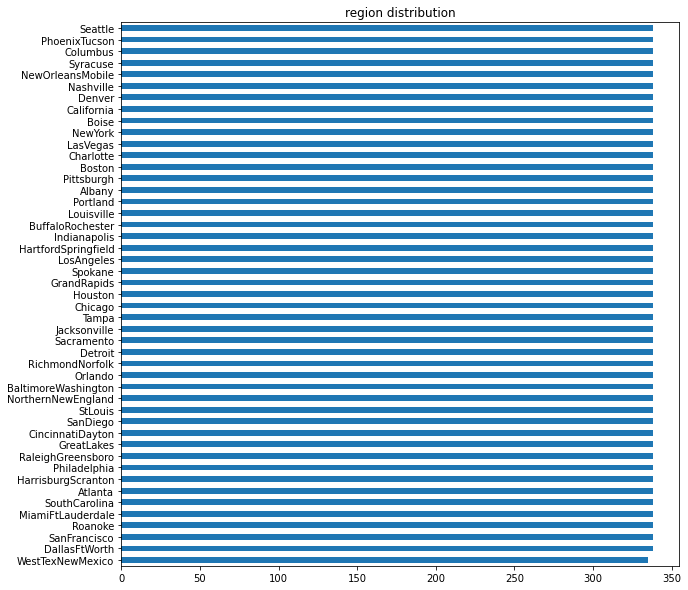

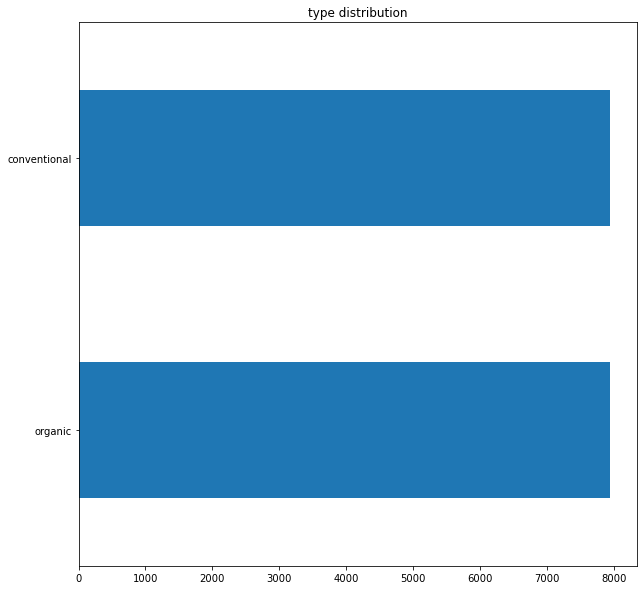

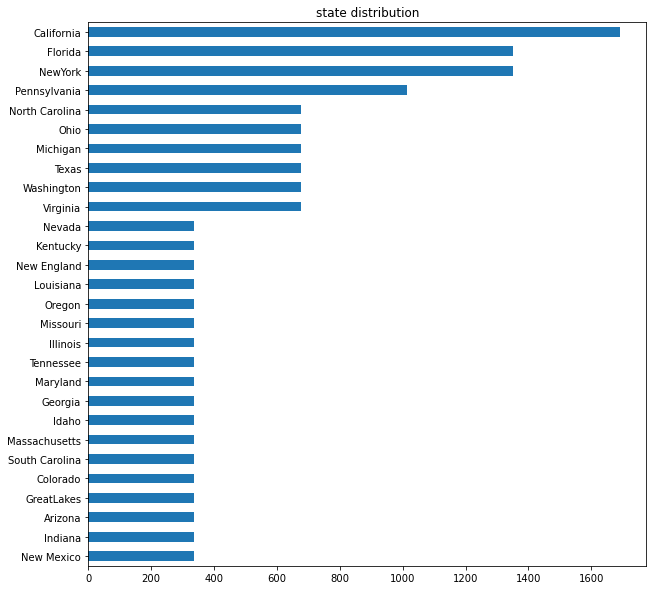

In [70]:
for cat in categorical_to_plot:
    plt.figure()
    df[cat].value_counts()[::-1].plot(kind="barh", figsize= (10,10))
    plt.title(cat+" distribution")

Numerical Columns:

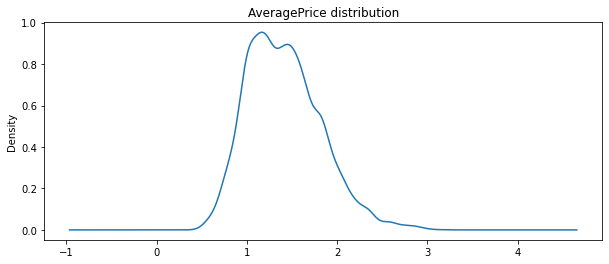

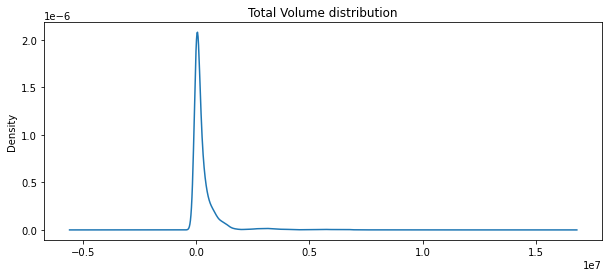

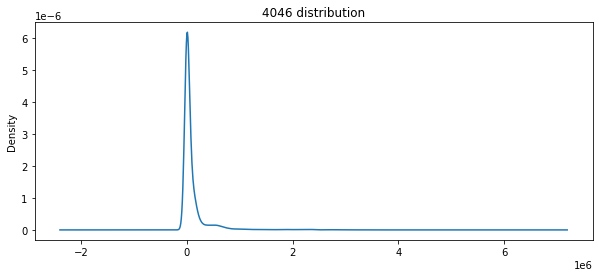

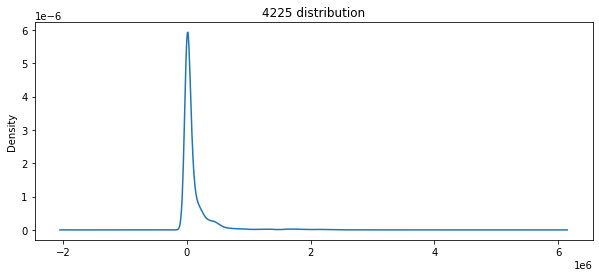

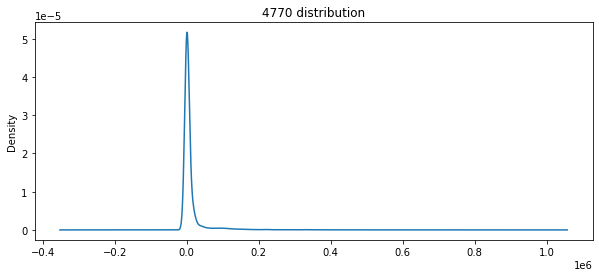

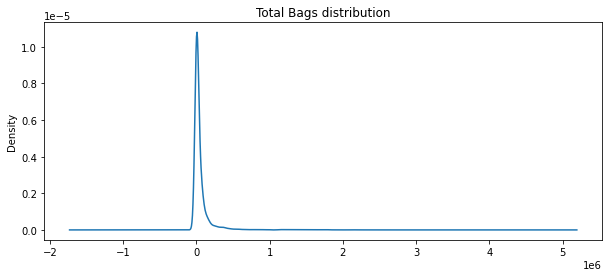

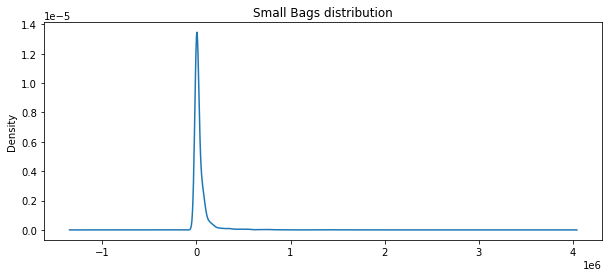

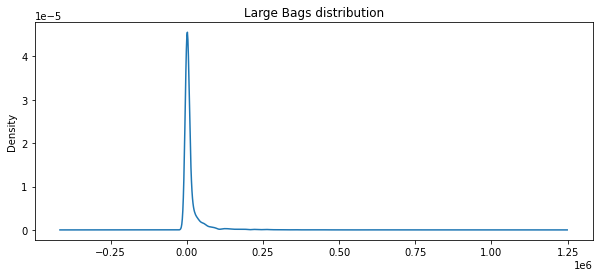

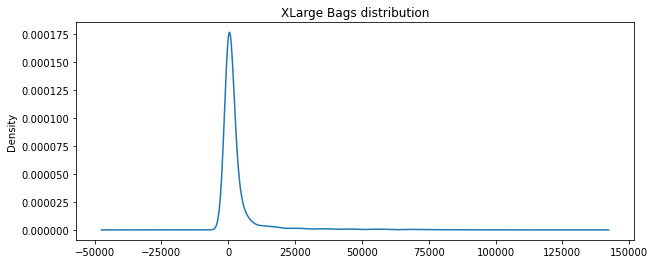

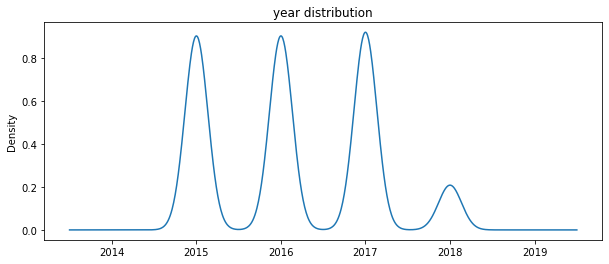

In [71]:
numerical_to_plot = numerical
for cat in numerical_to_plot:
    plt.figure()
    df[cat].plot.kde(figsize= (10,4))
    plt.title(cat+" distribution")

### Splitting the data to a train set and a test set

Assuming there isn't any difference in the avocado price for different seasons, the data will be selected randomly.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking that the splitting is good and all the data set's shape are right:

In [73]:
assert set(X_train.index) & set(X_test.index) == set()
assert X_train.shape[1] == X_test.shape[1]
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

### Taking care of Nan values
(Looking at the rows as well)  
  
  Nans in each column:

In [74]:
original_X_train_df = X_train.copy()
original_X_test_df = X_test.copy()
nan_values(df)

,missing values,% of total
Date,0,0.000000
AveragePrice,0,0.000000
Total Volume,0,0.000000
4046,0,0.000000
4225,0,0.000000
4770,0,0.000000
Total Bags,15,0.094441
Small Bags,159,1.001070
Large Bags,2370,14.921614
XLarge Bags,10873,68.456841


In [75]:
print('Number of rows with Nans in the train set:')
for i in X_train.columns:
    n_nans = X_train[i].isna().sum()
    if n_nans > 0:
        print(f"{i}:  {n_nans}")

Number of rows with Nans in the train set:
XLarge Bags:  8702
Total Bags:  8
state:  269
Large Bags:  1891
Small Bags:  122


In [76]:
print('Number of rows with Nans in the test set:')
for i in X_test.columns:
    n_nans = X_test[i].isna().sum()
    if n_nans > 0:
        print(f"{i}:  {n_nans}")

Number of rows with Nans in the test set:
XLarge Bags:  2171
Total Bags:  7
state:  69
Large Bags:  479
Small Bags:  37


  
Let's deal with the Nans:  

#### Droping useless columns:
The 'XLarge Bags' coulmn has 68% Nans in it, therefore it is useless and will be dropped.

In [77]:
X_train.drop(["XLarge Bags"], axis=1, inplace=True)
X_test.drop(["XLarge Bags"], axis=1, inplace=True)

['Large Bags', 'Small Bags', 'Total Bags'] : I'll suggest assigning the mean value for each of those features.  
the reason is low precentage of Nans for those 3, acoordingy [15% , 1%, 0.01%]

Large Bags before assigning the mean


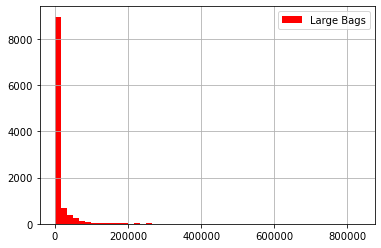

Large Bags after assigning the mean


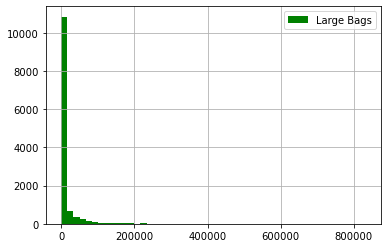

Small Bags before assigning the mean


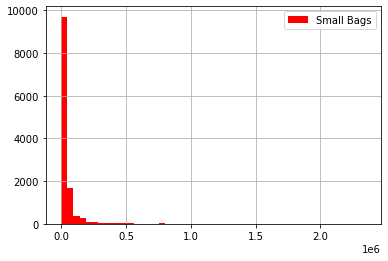

Small Bags after assigning the mean


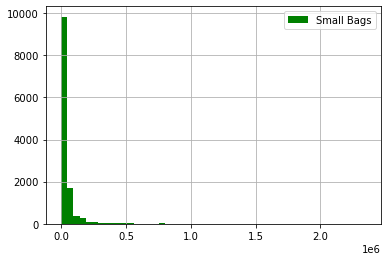

Total Bags before assigning the mean


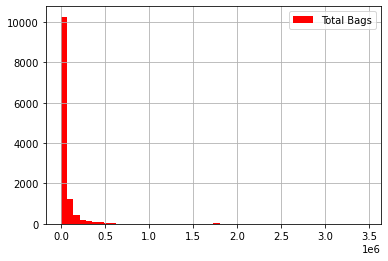

Total Bags after assigning the mean


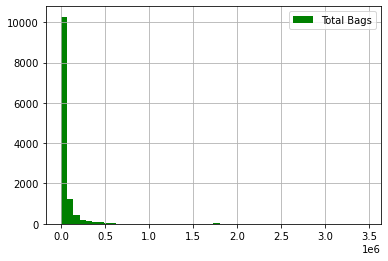

In [78]:
nan_to_mean = ['Large Bags', 'Small Bags', 'Total Bags']
for feat in nan_to_mean:
    print(feat + ' before assigning the mean')
    X_train[feat].hist(bins=50, legend=True, color='r')
    plt.show()
    curr_mean = df[feat].mean()
    X_train[feat] = X_train[feat].fillna(curr_mean)
    X_test[feat] = X_test[feat].fillna(curr_mean)
    print(feat + ' after assigning the mean')
    X_train[feat].hist(bins=50, legend=True, color='g')
    plt.show()

## state

Filling the Nans in the 'state' column is tricky. one way to solve it is by looking at the 'region' column,  
from it we can look what the state it and fill the missing information.  
because its a test and i dont have time to build/look for such a function,   
I will fill it with 'missing: should_be_filled_using_region'.

In [79]:
X_train['state'] = X_train['state'].fillna('missing: should_be_filled_using_region')
X_test['state'] = X_test['state'].fillna('missing: should_be_filled_using_region')

In [80]:
# after the operations we should not have any Nans
nan_values(X_train)

,missing values,% of total
Total Volume,0,0.0
year,0,0.0
4225,0,0.0
Total Bags,0,0.0
4046,0,0.0
day_name,0,0.0
state,0,0.0
4770,0,0.0
datetime,0,0.0
Large Bags,0,0.0


Let's check how much information we lost in the process:

In [81]:
print(f'original train shape: {original_X_train_df.shape}, original test shape: {original_X_test_df.shape}')
print(f'current train shape: {X_train.shape}, current test shape: {X_test.shape}')

original train shape: (12706, 15), original test shape: (3177, 15)
current train shape: (12706, 14), current test shape: (3177, 14)


### Taking care of outliers

Lets have a look on the outliers for each numeric column:

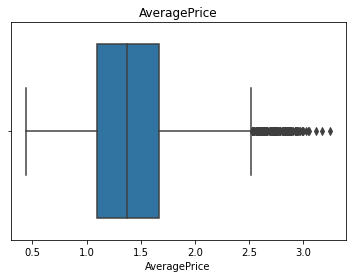

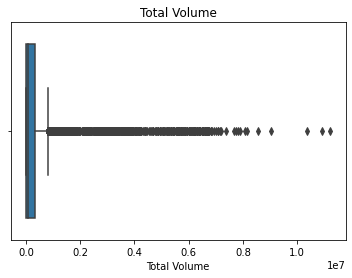

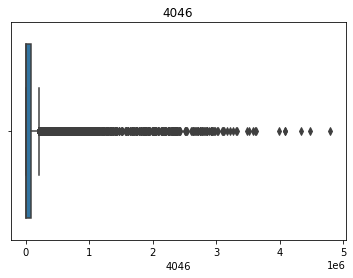

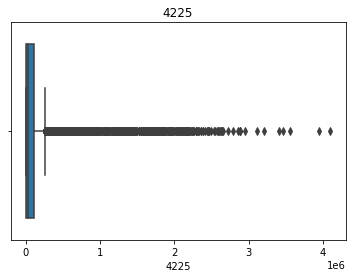

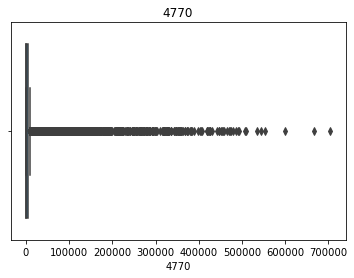

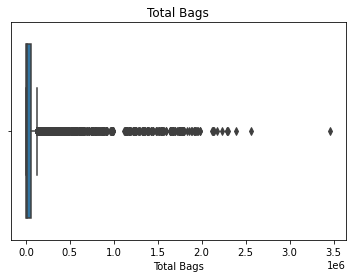

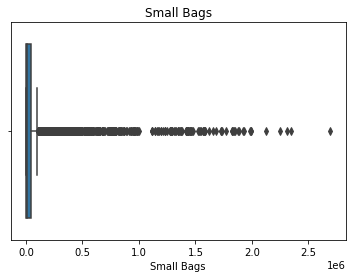

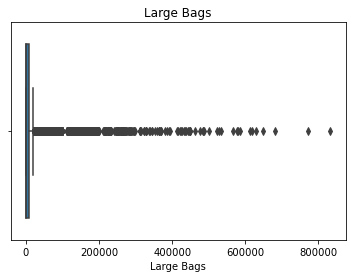

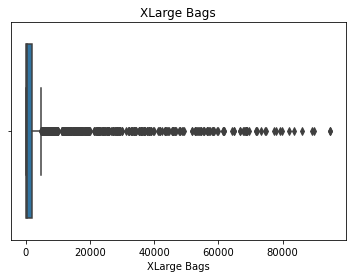

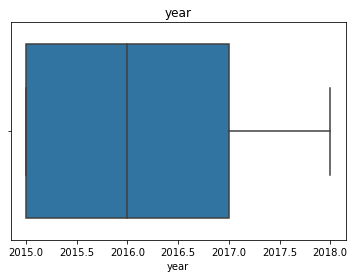

In [82]:
numeric_df = df.select_dtypes(include=np.number)
numeric_columns = numeric_df.columns
for col in numeric_columns:
    sns.boxplot(x=col, data=df)
    plt.title(col)
    plt.show()

In [83]:
# Ill explain why I chose to do each operation for each column's outliers:

# for ['Total Volume', 'Total Bags'], because the ouliers are far, ill use 0.95 of the data:
outliers_list_to_quantile = ['Total Volume', 'Total Bags']

# for ['4046', '4225', '4770'], because they are somewhat alike, ill use what falls between th 3std as in convention by statistics:
outliers_list_to_3std = ['4046', '4225', '4770']

# for ['Small Bags', 'Large Bags', 'XLarge Bags'], i'll clip them to max value.
# that is because the number of bugs might depend of how many bugs where in the store, and the amount doesn't really say anything.
# for example: a store with only small bags, or only XLarge bags etc.
outliers_list_to_clip = ['Small Bags', 'Large Bags', 'XLarge Bags']

outliers_list_to_quantile:

In [84]:
for feat in outliers_list_to_quantile:
    size_before = df[feat].size
    Q1 = df[feat].quantile(0.05)
    Q3 = df[feat].quantile(0.95)
    IQR = Q3 - Q1
    upper_Total = Q3 + 1.5 * IQR
    lower_Total = Q1 - 1.5 * IQR
    df = df[df[feat].between(lower_Total, upper_Total)]
    print(f'size reduction in {feat}: {df[feat].size/size_before}')

size reduction in Total Volume: 0.9796008310772524
size reduction in Total Bags: 0.9906806350022495


outliers_list_to_3std:

In [85]:
for feat in outliers_list_to_3std:
    size_before = df[feat].size
    std_feat = df[feat].std()
    mean_feat = df[feat].mean()

    bottom_bound_feat = max(mean_feat - 3 * std_feat, 0)
    top_bound_feat = mean_feat + 3 * std_feat
    
    df= df[df[feat].between(bottom_bound_feat, top_bound_feat)]
    print(f'size reduction in {feat}: {df[feat].size/size_before}')

size reduction in 4046: 0.9738549370701959
size reduction in 4225: 0.9806808340550263
size reduction in 4770: 0.9803002513416208


outliers_list_to_clip:

In [86]:
upper_small_bags_amount = 900000
upper_large_bags_amount = 400000
upper_xlarge_bags_amount = 40000
df['Small Bags'].clip(upper=upper_small_bags_amount, inplace=True)
df['Large Bags'].clip(upper=upper_large_bags_amount, inplace=True)
df['XLarge Bags'].clip(upper=upper_xlarge_bags_amount, inplace=True)

# Plots

Plotting the distribution of 3 variables against the dependent variable.  
For the purpose of presenting the work: one of the chosen features is numeric, and another one categorical.

## Which has greater demand? Organic vs Conventional

We can see there is more demand for organic type avocado!


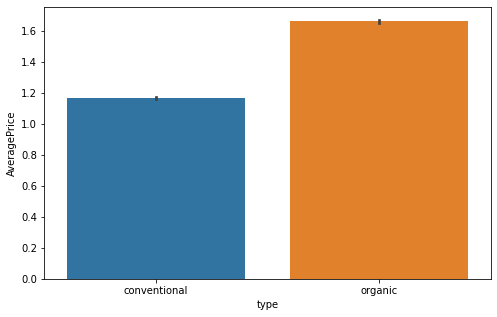

In [87]:
ax = sns.barplot(x="type", y=y, data=X_train)
plt.gcf().set_size_inches(8, 5)
print('We can see there is more demand for organic type avocado!')

## Demand by different states:

We can see the demand between different states dont vary a lot


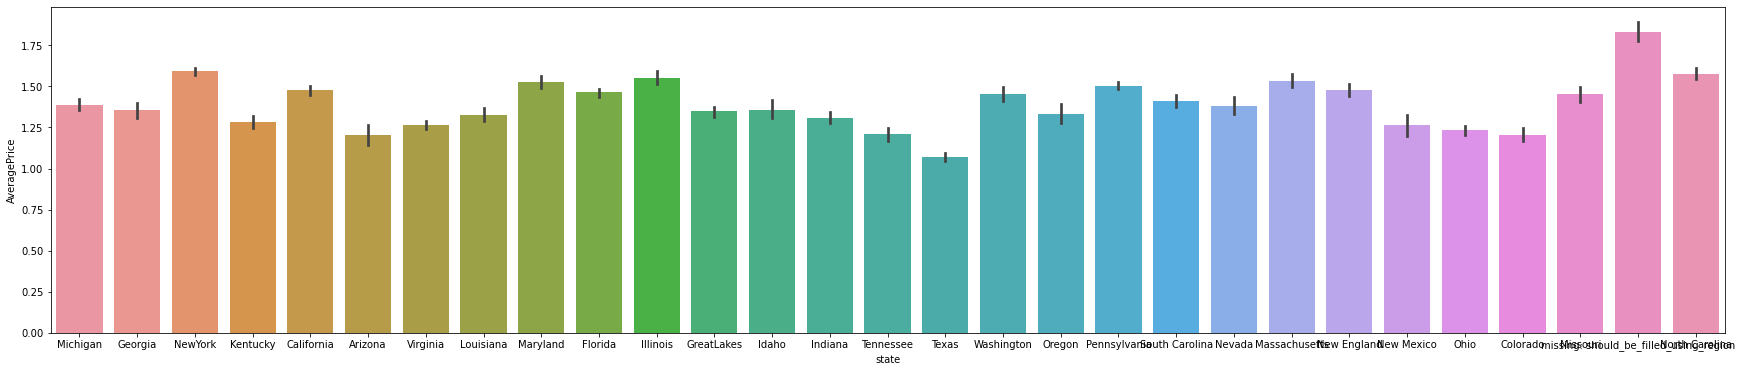

In [88]:
ax = sns.barplot(x="state", y=y, data=X_train)
plt.gcf().set_size_inches(30, 6)
print('We can see the demand between different states dont vary a lot')

## Distribution of AveragePrice vs year:

We can see less avocados that were bought at higher prices in 2018, compared to previous years price


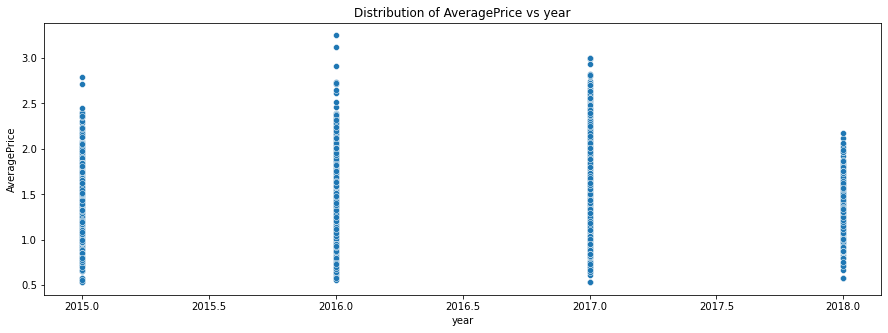

In [89]:
print('We can see less avocados that were bought at higher prices in 2018, compared to previous years price')
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x = 'year', y = y, data=X_test, ax=ax)
plt.title('Distribution of AveragePrice vs year')
plt.show()

Plotting the distribution of 3 independent variables against each other.  
For the purpose of presenting the work: one of the chosen features is numeric, and another one categorical.

## Correlation between Total Bags and their sizes:

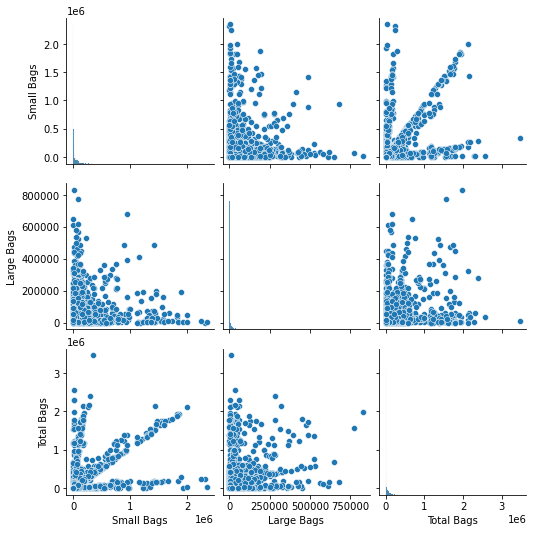

We can see some kind of correlation between Total Bags and Small Bags


In [90]:
sns.pairplot(X_train[['Small Bags', 'Large Bags', 'Total Bags']])
plt.show()
print('We can see some kind of correlation between Total Bags and Small Bags')

maybe there is a correlation between the types of the avocados?

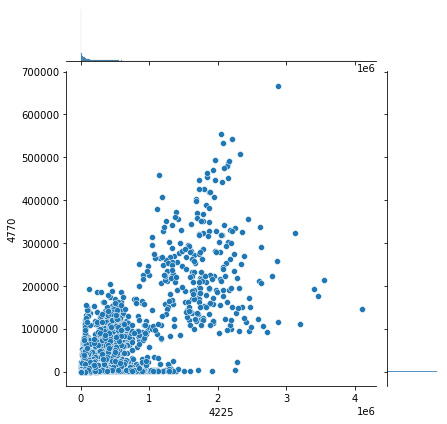

In [91]:
sns.jointplot(x='4225', y='4770', data=X_train)
plt.show()

There isnt a clear correlation.

## Correlation between ['Total Bags', 'Total Volume', '4225']:

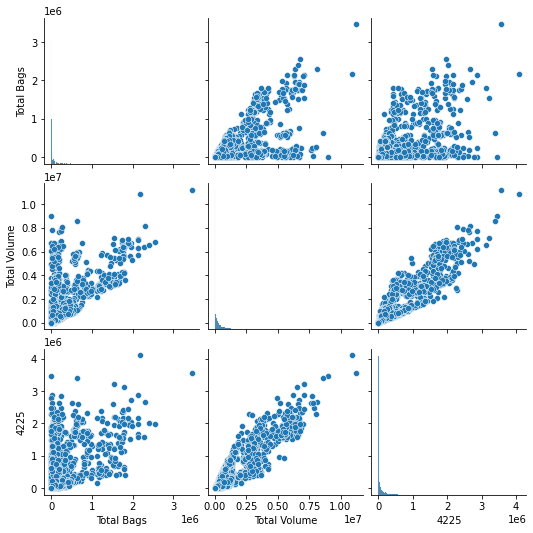

We can see correlation between TotalVolume and 4225 type, which might say this type is popular


In [92]:
sns.pairplot(X_train[['Total Bags', 'Total Volume', '4225']])
plt.show()
print('We can see correlation between TotalVolume and 4225 type, which might say this type is popular')

### Generating a correlation matrix and plotting a heat map

              Total Volume      year      4225  Total Bags      4046  \
Total Volume      1.000000  0.026855  0.918206    0.699283  0.903453   
year              0.026855  1.000000 -0.016133    0.101279 -0.003109   
4225              0.918206 -0.016133  1.000000    0.597367  0.709772   
Total Bags        0.699283  0.101279  0.597367    1.000000  0.577751   
4046              0.903453 -0.003109  0.709772    0.577751  1.000000   
4770              0.751328 -0.033859  0.773770    0.513216  0.552413   
Large Bags        0.328507  0.086295  0.284023    0.333756  0.220041   
Small Bags        0.653680  0.074345  0.575622    0.512986  0.541996   

                  4770  Large Bags  Small Bags  
Total Volume  0.751328    0.328507    0.653680  
year         -0.033859    0.086295    0.074345  
4225          0.773770    0.284023    0.575622  
Total Bags    0.513216    0.333756    0.512986  
4046          0.552413    0.220041    0.541996  
4770          1.000000    0.307311    0.462466  
Large Ba

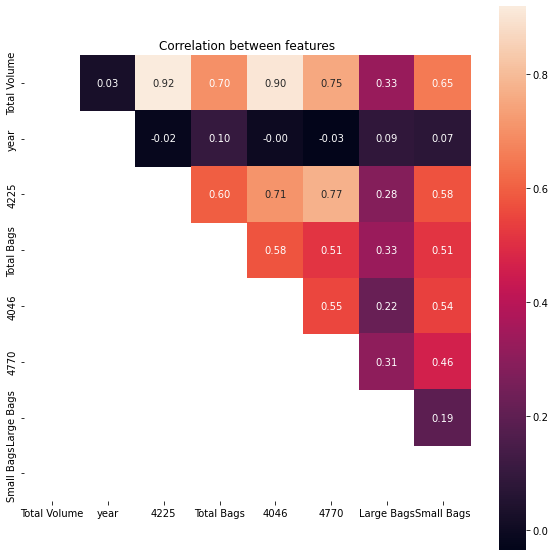

We can see correlation between TotalVolume and 4225&4770


In [93]:
print(X_train.corr())

fig, ax = plt.subplots(figsize=(10,10))
corr = X_train.corr()
mask = np.tril(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, fmt=".2f", mask = mask, square = True, ax=ax)
plt.title('Correlation between features')
plt.show()
print('We can see correlation between TotalVolume and 4225&4770')

# Transforming the categorical features

**logic:**  
We need to transform the categorical features so we can use them as an input for a model.
The business logic for doing so is that one of them may affect strongly on the target to predict.

In [94]:
X_train = pd.get_dummies(X_train,drop_first=True)

In [95]:
X_test = pd.get_dummies(X_test,drop_first=True)

### Now the data is ready to be moved into a model for predicting the target!